In [1]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm
from scipy.special import comb
from itertools import combinations_with_replacement
from collections import Counter
import copy
from scipy.linalg import ishermitian

# Bose-Hubbard Model

In [2]:
def normalizeWF(psi,**kwargs):
    shape, dtype = psi.shape, psi.dtype
    NWF = psi
    if np.array_equal(psi, np.zeros(shape, dtype = dtype)) == True:
        NWF = psi
    elif np.vdot(psi, psi) == 0:
        NWF = psi
    else:
        NWF = psi/(np.sqrt(np.vdot(psi, psi)))
    return NWF

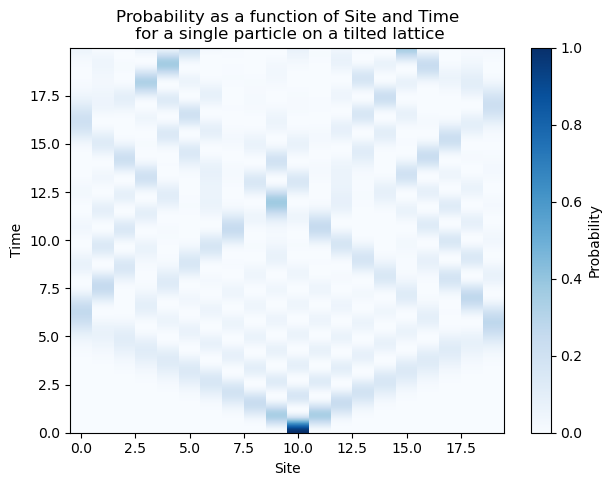

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

params = {
    'N': 20, # no. of sites
    't':1.0,
    'localized_site': 10,
    'T': 20,
    'tau': 0.01
}

psi0 = np.zeros(params['N'], dtype=complex)
psi0[params['localized_site']] = 1.0
N = params['N']
t_list, psi_t = np.arange(0, params['T'], params['tau']), []
# t_list = np.linspace(0, 10, 100)
H = np.zeros((N, N), dtype=complex)
for i in range(N-1):
    H[i][i+1], H[i+1][i] = -params['t'], -params['t']
for i, t in enumerate(t_list):
    U = expm(-1j*H*t)
    psi_t +=  [U@psi0]

probabilities = np.abs(np.array(psi_t))**2
site_list = list(range(0, params['N'], 1))
# Plotting heatmap
plt.figure(figsize=[7, 5])
p = plt.get_cmap('Blues')
# plt.imshow(probabilities, aspect='auto', origin='lower', extent=[0, params['N'], 0, params['T']], cmap='crest')
# t_list = list(reversed(t_list))
# probabilities = probabilities[::-1]
plt.pcolormesh(site_list, t_list, probabilities, cmap=p)
plt.colorbar(label='Probability') #need a colorbar to show the intensity scale
# plt.show() #boom
# plt.colorbar(label='Probability')
plt.xlabel('Site')
plt.ylabel('Time')
plt.title('Probability as a function of Site and Time\n for a single particle on a tilted lattice')
plt.show()

# plt.figure(figsize=[7,5])
# for i in range(params['N']):
#     prob = [np.abs(psi[i])**2 for psi in psi_t]
#     plt.plot(t_list, prob, label=f"Site {i}")
#     plt.legend()
#     plt.xlabel("Time")
#     plt.ylabel("Probability")
#     plt.title(f"Probability as a function of Time for each site")
#     plt.grid('on')
#     prob = []
# plt.show()

#     fig, ax = plt.subplots()

#     c = ax.pcolormesh(t_list, [i for i in range(param['N'])], prob, cmap='RdBu', vmin=z_min, vmax=z_max)
#     ax.set_title('pcolormesh')
#     # set the limits of the plot to the limits of the data
#     ax.axis([x.min(), x.max(), y.min(), y.max()])
#     fig.colorbar(c, ax=ax)

# plt.show()

#############################################################
#############################################################

#############################################################
#############################################################
# n, site, t, psi_t = 10, 5, 1.0, []
# H = np.zeros((n, n), dtype=complex)
# for i in range(n-1):
#     H[i, i+1] = -t
#     H[i+1, i] = -t


# psi0 = np.zeros(n, dtype=complex)
# psi0[site] = 1.0

# times = np.linspace(0, 10, 100)
# evolution = []
# for t in times:
#     U = expm(-1j * H * t)
#     psi_t += [U@psi0]
# #     evolution.append(psi_t)
# print(t_list)
# print(times)

# fig, ax = plt.subplots()
# for i in range(n):
#     probabilities = [np.abs(psi[i])**2 for psi in psi_t]
#     ax.plot(times, probabilities, label=f'Site {i}')
# ax.set_xlabel('Time')
# ax.set_ylabel('Probability')
# ax.legend()
# plt.show()


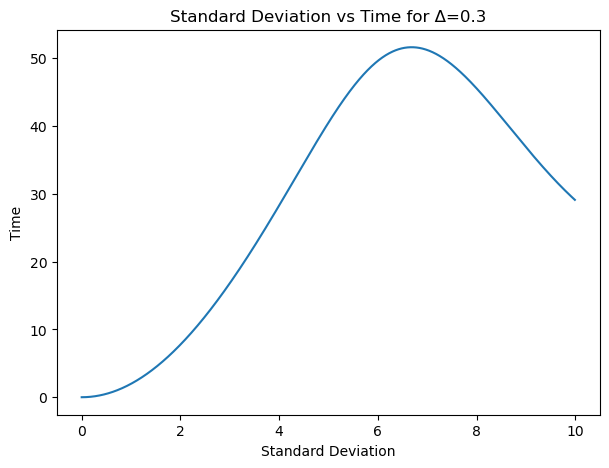

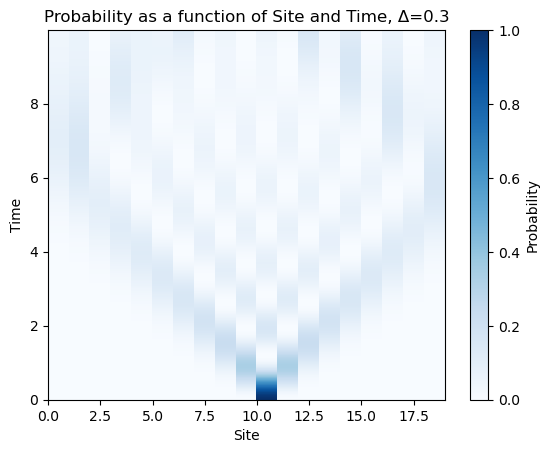

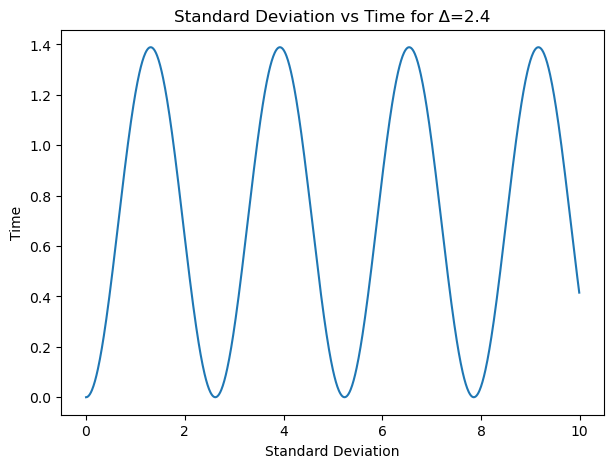

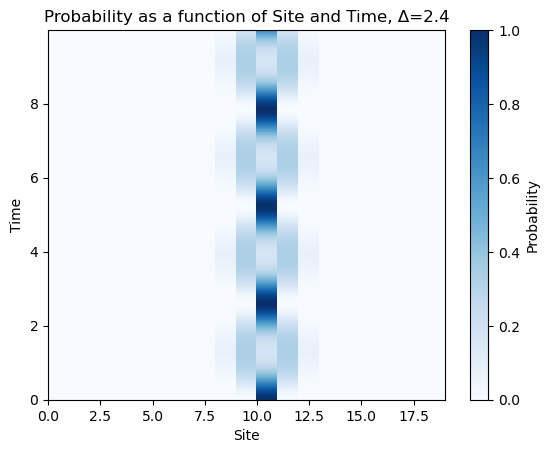

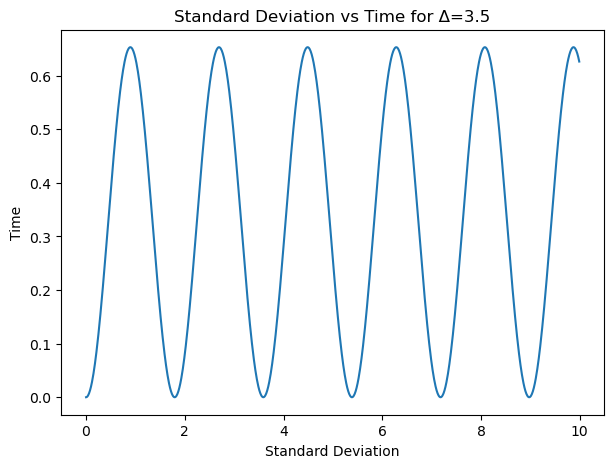

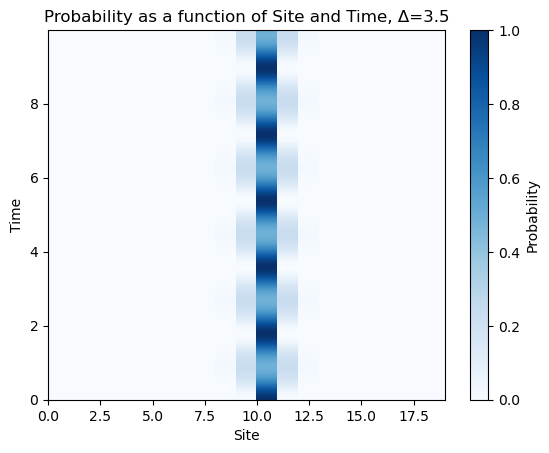

In [22]:
params = {
    'N': 20, # no. of sites
    't':1.0,
    'localized_site1': 10,
    'T': 10,
    'tau': 0.01
}

psi0 = np.zeros(params['N'], dtype=complex)
psi0[params['localized_site1']] = 1.0
N = params['N']
params['deltA_list'] = [0.3, 2.4, 3.5] 
t_list, psi_t = np.arange(0, params['T'], params['tau']), []
std_devj=0
for deltA in params['deltA_list']:
    t_list, psi_t = np.arange(0, params['T'], params['tau']), []
    params['deltA'] = deltA
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        H[i][i+1], H[i+1][i] = -params['t'], -params['t']
        H[i][i] = -i*params['deltA']
        if i == (N-2):
            H[i+1][i+1] = -(i+1)*params['deltA']
    # print(H)
    for i, t in enumerate(t_list):
        U = expm(-1j*H*t)
        psi_t +=  [U@psi0]
    probabilities = np.abs(np.array(psi_t))**2
    # print(repr(probabilities))
    # print(np.std(probabilities[0]))
    site_list = list(range(0, params['N'], 1))
    plt.figure(figsize=[7, 5])
    p = plt.get_cmap('Blues')
    std_deviation = []
    for i, prob in enumerate(probabilities):
        for j, pj in enumerate(prob):
            std_devj += ((j-params['localized_site1'])**2)*pj
    #     print(f'sum_prob_row-wise_time={i}={sum(prob)}')
        std_deviation += [std_devj]
        std_devj=0
    plt.plot(t_list, std_deviation)
    plt.xlabel('Standard Deviation')
    plt.ylabel('Time')
    plt.title(f'Standard Deviation vs Time for Δ={deltA}')
    plt.show()
    plt.pcolormesh(site_list, t_list, probabilities, cmap=p)
    plt.colorbar(label='Probability') 
    plt.xlabel('Site')
    plt.ylabel('Time')
    plt.title(f'Probability as a function of Site and Time, Δ={deltA}')
    plt.show()


In [7]:
def create_heatmap(X, Y, probabilities):
    X = np.array(X)
    Y = np.array(Y)
    probabilities = np.array(probabilities)
#     print(f'X={X}')
#     print(f'Y={Y}')
    probability = []
    for i, prob in enumerate(probabilities):
        probability += [float((np.abs(prob))**2)]
#     print(probability)
#     print(f'prob={probability}\n')
    plt.figure(figsize=[7, 5])
    p = plt.get_cmap('Blues')
    
#     sns.scatterplot(x=X, y = Y, hue=probability, palette="viridis")

    x_unique = np.unique(X)
    y_unique = np.unique(Y)
    heatmap_data = np.zeros((len(y_unique), len(x_unique)))

    x_index = {value: idx for idx, value in enumerate(x_unique)}
    y_index = {value: idx for idx, value in enumerate(y_unique)}

    for (x, y, prob) in zip(X, Y, probabilities):
        i = y_index[y]
        j = x_index[x]
        heatmap_data[i, j] = (np.abs(prob))**2

    sns.heatmap(heatmap_data, cmap=p)
#     sns.scatterplot(x=X, y = Y, hue=probabilities)
    plt.xlabel('Site i')
    plt.ylabel('Site j')
    mu = params['mu']
    plt.title(f'Probability as a function of Sites i and j, Δ={mu}')
#     plt.colorbar(label='Probability') 
    plt.show()

In [24]:
params['dim'] = 0
params['occupationTuple_lst'] = []
params['U'] = 1
params['Map_ParticleLoc_OccupNo']={}
params['map_occupToD_Dim'] = {}




def dimension(params, **kwargs):
    '''
    For k identical bosonic particles on N lattice site, 
    Changes the dim and initializes the vac state
    based on dim.
    '''
    N, k, dim = params['N'], params['k'], int(params['dim']) # N = number of sites, k = no. of identical bosonic particles
    params['dim'] = int(comb(N+k-1, k)) # This is for k identical bosonic particles
    params['vac'] = np.zeros(N)
    pass
params['N'], params['k'] = 20, 2
dimension(params)
# print(params['dim'])
# print(repr(params['vac']))


def basis_states(params, **kwargs):
    '''
    For k-identical particles on N lattice site, 
    states_vec contain permutations of the particles
    arranged on the lattice.
    '''
    N, vac, k, dim, states_vec, occupation_lst = params['N'], params['vac'], params['k'], params['dim'], [], []
    occupationTuple_lst, Map_ParticleLoc_OccupNo = params['occupationTuple_lst'], params['Map_ParticleLoc_OccupNo']
    # particle_location: Gives all combinations of particle's location.
    # Gives list of tuples in which site each particle is located.
    particle_location = list(combinations_with_replacement(range(N), k)) 
#     print(f'particle_location={particle_location}')
    for i, p_loc in enumerate(particle_location):
        occupationTuple = [0 for _ in range(N)]
#         print(occupationTuple)
        vac = np.zeros(N, dtype=int)
        for site in p_loc:
#             print(f'site={site}')
            occupationTuple[site]+=1
            vac[site]+=1
        states_vec += [vac]
        params['occupationTuple_lst'] += [tuple(occupationTuple)]
        Map_ParticleLoc_OccupNo[p_loc] = tuple(occupationTuple)
#         print(params['occupationTuple_lst'])
#         states_vec += [normalizeWF(vac)]
#         count = Counter(p_loc)
#         print(f'count={count}')
#         for key, val in count.items():
#             vac[i][key] = val
#             print(f'vac[{i}][{key}]={val}')
#         vac[i] = normalizeWF(vac[i])
#     print(states_vec)    
    normfactors = {key: [] for key in occupationTuple_lst}
    params['normfactors'] = normfactors
    return states_vec, particle_location, occupationTuple_lst, normfactors, Map_ParticleLoc_OccupNo
bstates = basis_states(params)        
params['states_vec'] = bstates[0]
# print(params['states_vec'])
params['particle_location'] = bstates[1]
params['occupationTuple_lst'] = bstates[2]
params['normfactors'] = bstates[3]
params['Map_ParticleLoc_OccupNo'] = bstates[4]
# print(params['Map_ParticleLoc_OccupNo'])
# print(f'params[particle_location]={bstates[1]}')
# print(f'params[occupationTuple_lst]={bstates[2]}')
# print(f'params[normfactors]={bstates[3]}')


# def creationOp(params, **kwargs):
#     particle_location, occupationTuple_lst = params['particle_location'], params['occupationTuple_lst']
#     normfactors = params['normfactors']
# #     for key, val in normfactors:
        
# #     count = Counter(particle_location)
# #     print(f'normfactors={normfactors}')
#     pass
# creationOp(params)    

# def HamiltonianElements(params, **kwargs):
#     N, states_vec = params['N'], params['states_vec']
#     normfactors = params['normfactors']
#     states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
#     creationOp, annihOp = False, False
#     for k in range(N-1):
#         print(f'states_vec1={states_vec1}')
#         print(f'states_vec2={states_vec2}')
#         for i, state in enumerate(states_vec1):
#             for j, number in enumerate(state):
#                 if k == j and state[k]!=0:
#                     print(f'state_vec1[i={i}]={state}')
#                     state[k] -= 1
#                     print(f'c_(k={k},j={j}) ={state[k]}, {state}')
#                     if k+1 == j+1:
#                         state[k+1] += 1
#                         print(f'dagger-c_(k={k+1},j={j+1}) ={state[k+1]}, {state}\n')
#                 elif k == j and state[k]==0:
#                     print('Testing1')
#                     state = np.zeros(N)
#                     print(f'c_(k={k},j={j}) ={state[k]}, {state}\n')
#                 if k+1 == j+1 and states_vec2[i][k+1]!=0:
# #                     print('Testing')
#                     print(f'states_vec2[i={i}]={states_vec2[i]}')
#                     states_vec2[i][k+1] -=1
#                     print(f'c_(k={k},j={j}) ={states_vec2[i][k]},{states_vec2[i]}')
#                     if k==j:
#                         states_vec2[i][k] +=1
#                         print(f'dagger-c_(k={k+1},j={j+1}) ={states_vec2[i][k+1]}, {states_vec2[i]}\n')
#                 elif k+1 == j+1 and states_vec2[i][k+1]==0:
#                     print('Testing2')
#                     states_vec2[i] = np.zeros(N)
#                     print(f'c_(k={k+1},j={j+1}) ={states_vec2[i][k+1]}, {states_vec2[i]}\n')
#                 print(f'At the end of j={j}')
#                 print(f'states_vec1={states_vec1}')
#                 print(f'states_vec2={states_vec2}\n')
#             print(f'At the end of i={i}')
#             print(f'states_vec1={states_vec1}')
#             print(f'states_vec2={states_vec2}\n')
# #             print('*********************************************')
# #                 print(i, state, states_vec[i])
# #     print(f'states_vec1={states_vec1}')
# #     print(f'states_vec2={states_vec2}')
#     pass
  
def Mapping_occupationToD_DimBasis(params, **kwargs):
    occupationTuple_lst, dim, map_occupToD_Dim = params['occupationTuple_lst'], params['dim'], params['map_occupToD_Dim']
    for i, occup_state in enumerate(occupationTuple_lst):
        map_occupToD_Dim[occup_state] = np.eye(1,dim,i)[0]
    zero_tupleComb = tuple(np.zeros(params['N'], dtype=int))
    map_occupToD_Dim[zero_tupleComb] = np.zeros(dim)
#     print(map_occupToD_Dim)
    return map_occupToD_Dim
# Mapping_occupationToD_DimBasis(params)

def Normalize_OccupNo(params, **kwargs):
    normfactors = params['normfactors']
    state, factor = kwargs['state'], kwargs['factor']
    if 'annihOp' in kwargs:
#         normfactors[state].append(1/np.sqrt(factor))
#         normfactors[state].append(factor)
        nf = 1/np.sqrt(factor)
#         nf = factor
#         print(normfactors)
    elif 'createOp' in kwargs:
#         normfactors[state].append(1/np.sqrt(factor+1))
#         normfactors[state].append(factor+1)
#         nf = factor+1
        nf = 1/np.sqrt(factor+1)
#         print(normfactors[state])
    return nf

# def numberOp(params, **kwargs): # a_{+, i} a_{-, i} operator
    

# params['mu'] = 0.4
def HamiltonianElements(params, **kwargs):
    N, states_vec, dim = params['N'], params['states_vec'], params['dim']
    map_occupToD_Dim = Mapping_occupationToD_DimBasis(params)
    normfactors1, normfactors2 = copy.deepcopy(params['normfactors']), copy.deepcopy(params['normfactors'])
    Hr = np.zeros((dim, dim))
    states_vec1, states_vec2, states_vec3 = copy.deepcopy(states_vec), copy.deepcopy(states_vec), copy.deepcopy(states_vec)
#     print(f'states_vec1={states_vec1}')
#     print(f'states_vec2={states_vec2}')
#     print(f'states_vec3={states_vec3}')
    createOp, annihOp = False, False
    for i, state in enumerate(states_vec1): # Goes through each state
#         print(f'states_vec1={states_vec1}')
#         print(f'states_vec2={states_vec2}')
#         states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
        vec3 = tuple(states_vec3[i])
#         print(f'\033[1mvec3={vec3}\033[0m')
#         for j, number in enumerate(state): # To loop through each site in a state - need it to apply Ck_{+}C_(k+1){-}
        for k in range(N-1):
            states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
            states_vec4 = copy.deepcopy(states_vec)
            state = states_vec1[i]
#             print(f'\nAt the start of k={k}\n')
            ### For hopping term
            if state[k]>0: # C(k+1)_{+}C_(k){-}: states_vec1
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
#                 normfactors[vec3].append(Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
#                                                             factor = state[k], annihOp=annihOp))
                normfactors1[vec3].append(nf1)
                state[k] -= 1 # annihilation
#                 normfactors[vec3].append(Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
#                                   factor = state[k+1], createOp=createOp))
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1], createOp=createOp)
                normfactors1[vec3].append(nf2)
                state[k+1] += 1 # creation
#                 print(f'C(k+1={k+1})_(+)C_(k={k})_(-):')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            elif state[k] == 0: #annihilation
                state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k+1={k+1})_(+)C_(k={k})(-) for when state[k]==0:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            if states_vec2[i][k+1]>0: # C(k)_{+}C_(k+1){-}: states_vec2
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = states_vec2[i][k+1], annihOp=annihOp)
                normfactors2[vec3].append(nf1)
                states_vec2[i][k+1] -= 1 #annihilation
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = states_vec2[i][k], createOp=createOp)
                normfactors2[vec3].append(nf2)
                states_vec2[i][k] += 1 #creation
#                 print(f'C(k={k})_(+)C_(k+1={k+1})(-):')
#                 print(f'states_vec2[i]={states_vec2[i]}')
#                 print(f'normfactors2[vec3]={normfactors2[vec3]}\n')
            elif states_vec2[i][k+1] == 0: #annihilation
                states_vec2[i] = np.zeros_like(state)
                normfactors2[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k+1={k+1})(-) for when state[k+1]==0:')
#                 print(f'states_vec2[i]={states_vec2[i]}')
#                 print(f'normfactors2[vec3]={normfactors2[vec3]}\n')
#             print(f'normfactors1[vec3]={normfactors1[vec3]}')
#             print(f'normfactors2[vec3]={normfactors2[vec3]}')
#             print(map_occupToD_Dim)
            state1 = map_occupToD_Dim[tuple(state)] # C(k+1)_{+}C_(k){-}: states_vec1
            state2 = map_occupToD_Dim[tuple(states_vec2[i])] # C(k)_{+}C_(k+1){-}: states_vec2
#             print(tuple(state))
#             print(tuple(states_vec2[i]))
#             print(state1)
#             print(state2)
#             print(np.prod(normfactors1[vec3]))
#             print(np.prod(normfactors1[vec3])*state1)
            Hr[i] += -params['t']*(np.prod(normfactors1[vec3])*state1 + np.prod(normfactors2[vec3])*state2)
#             print(Hr)
            normfactors1[vec3], normfactors2[vec3] = [], []
#             print(f'states_vec1[i={i}]={state}')
#             print(f'states_vec2[i={i}]={states_vec2[i]}')
#             Hr[i] += states_vec2[i]+state
#             print(f'Hr={Hr}')

            ### For mu and U a_dagger a terms- 
            state = states_vec4[i]
#             print(state)
            if state[k]>0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
#                 state[k]+=1
#                 print(f'C(k={k})_(+)C_(k={k})_(-):')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            elif state[k]==0:
#                 state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k={k})_(-) for when state[k]==0:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            state1 = map_occupToD_Dim[tuple(state)]
            Hr[i] += -params['mu']*(k)*(np.prod(normfactors1[vec3])*state1)
            Hr[i] += -params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3] = []
            if k == (N-2) and state[k+1]!=0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                        factor = state[k+1], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k+1]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
#                 state[k+1]+=1
#                 print(f'C(k={k+1})_(+)C_(k={k+1})_(-) for when k==N-2:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
                state1 = map_occupToD_Dim[tuple(state)]
#                 print(state1)
                Hr[i] += -params['mu']*(k+1)*(np.prod(normfactors1[vec3])*state1)
                Hr[i] += -params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            elif k == (N-2) and state[k+1]==0:
#                 state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k={k})_(-) for when state[k]==0 and k==N-2:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
                state1 = map_occupToD_Dim[tuple(state)]
#                 print(state1)
                Hr[i] += -params['mu']*(np.prod(normfactors1[vec3])*state1)
                Hr[i] += -params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3], normfactors2[vec3] = [], []
            
            ### For U term
            states_vec4 = copy.deepcopy(states_vec)
            state = states_vec4[i]
            if state[k]>0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
                nf3 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
                normfactors1[vec3].append(nf3)
#                 state[k]-=1
                nf4 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k]-1, createOp=createOp)
                normfactors1[vec3].append(nf4)
#                 state[k]+=1
#                 print(f'C(k={k})_(+)C_(k={k})_(-):')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            elif state[k]==0:
#                 state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k={k})_(-) for when state[k]==0:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            state1 = map_occupToD_Dim[tuple(state)]
            Hr[i] += params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3] = []
            if k == (N-2) and state[k+1]!=0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                        factor = state[k+1], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k+1]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
                nf3 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                        factor = state[k+1], annihOp=annihOp)
                normfactors1[vec3].append(nf3)
#                 state[k+1]-=1
                nf4 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1]-1, createOp=createOp)
                normfactors1[vec3].append(nf4)
#                 state[k+1]+=1
#                 print(f'C(k={k+1})_(+)C_(k={k+1})_(-) for when k==N-2:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
                state1 = map_occupToD_Dim[tuple(state)]
                Hr[i] += params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            elif k == (N-2) and state[k+1]==0:
                normfactors1[vec3].append(0)
                state1 = map_occupToD_Dim[tuple(state)]
                Hr[i] += params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3], normfactors2[vec3] = [], []
            
            
            
#     print(Hr)
#     print(ishermitian(Hr))
    eigval, eigvec = np.linalg.eig(Hr)
    diagonal_Hr = np.diag(eigval)
#     print(Hr)
    return Hr, diagonal_Hr

In [45]:
print(Mapping_occupationToD_DimBasis(params))

In [35]:
mp = Mapping_occupationToD_DimBasis(params)

In [46]:
psi0 = np.zeros(params['dim'])
for key, val in Map_ParticleLoc_OccupNo.items():
    if key[0] == key[1]:
        psi0 +=(1/np.sqrt(2))*mp[val]
# print(psi0.shape)
# print(params['dim'])

<Figure size 504x360 with 0 Axes>

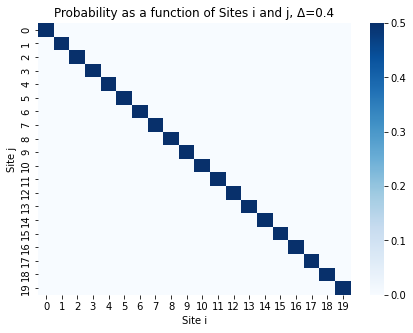

<Figure size 504x360 with 0 Axes>

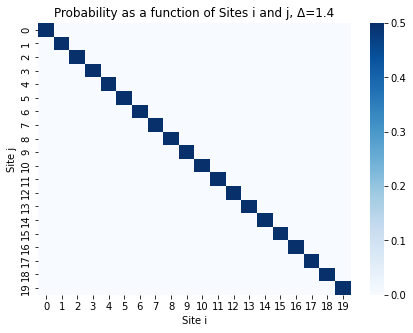

<Figure size 504x360 with 0 Axes>

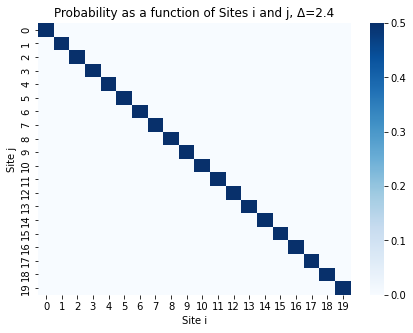

<Figure size 504x360 with 0 Axes>

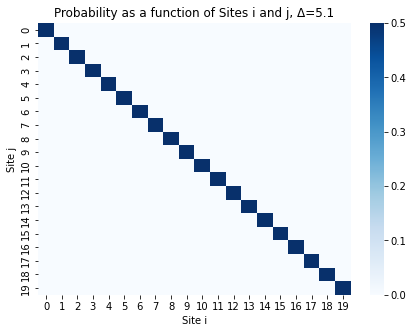

In [47]:
# psi0 =(1/np.sqrt(2))*np.array([float(i) for i in Map_ParticleLoc_OccupNo[(0,0)]])

for mu in [0.4, 1.4, 2.4, 5.1]:
    params['mu'] = mu
    Hr, diagonal_Hr = HamiltonianElements(params)
    # eigval, eigvec = np.linalg.eig(Hr)
    # print(Hr)
    # print(diagonal_Hr)
    # print(f'eigval={eigval}\n eigvec={eigvec}')

    params['tau'] = 1
#     psi0 = np.random.randn(params['dim'])

#     psi0 = np.zeros(params['dim'], dtype=complex)
#     psi0[10] = 0.25
#     psi0[11] = 0.25
#     psi0[12] = 0.5

#     psi_nm = normalizeWF(psi0)
#     print(f'psi0={psi0}\n')
#     print(f'psi_nm={psi_nm}\n')

    params['T'] = 10
    t_list, psi_t = np.arange(0, params['T'], params['tau']), []
    # print(t_list)
    for i, t in enumerate(t_list):
        U = expm(-1j*diagonal_Hr*t)
        psi_t +=  [U@psi0]

    # print(psi_t)
    Map_ParticleLoc_OccupNo = params['Map_ParticleLoc_OccupNo'] 
    # print(f'Map_ParticleLoc_OccupNo={Map_ParticleLoc_OccupNo}')
    # particle_location = list(combinations_with_replacement(range(params['N']), params['k'])) 
    # print(f'particle_location={particle_location}')

    # print(psi_nm)
    # print(psi_t)
    prob, x, y = [], [], []
    map_occupToD_Dim = Mapping_occupationToD_DimBasis(params)
    # print(map_occupToD_Dim)
    for psi in psi_t:
        for i, p in enumerate(psi):
            prob+=[p]
            f = np.zeros(params['dim'])
            f[i] = 1.0
    #         print(repr(f))
    #         print(f'psi={psi}')
    #         print(f'i={i}, p = {p}')
            for key, val in map_occupToD_Dim.items():
                if np.array_equal(f, val) == True:
                    for site, v in Map_ParticleLoc_OccupNo.items():
                        if v == key:
                            x += [site[0]]
                            y += [site[1]]
    #                         print(key, site)
    #                 print('\n')

    #         print(f'map_occupToD_Dim[i={i}] = {map_occupToD_Dim[i]}\n')

    mu = params['mu']
    plt.figure(figsize=[7, 5])
    p = plt.get_cmap('Blues')
#     print(prob[0])
    # print(f'x={len(x)}, y={len(y)}, prob={len(prob)}')
    create_heatmap(x, y, prob)

# x, y, prob = np.array(x), np.array(y), np.array(prob)
# print(f'x={repr(x)}\ny={y.shape}\nprob={prob}')

# X = np.array(X)
# Y = np.array(Y)
# probabilities = np.array(probabilities)

# # Determine the unique values and the dimensions of the heatmap
# x_unique = np.unique(X)
# y_unique = np.unique(Y)
# print(repr(y_unique))
# heatmap_data = np.zeros((len(y_unique), len(x_unique)))

# # Fill the heatmap data
# for (x, y, prob) in zip(X, Y, probabilities):
#     print(repr(y))
#     i = np.where(y_unique == y)[0][0]
#     j = np.where(x_unique == x)[0][0]
#     heatmap_data[i, j] = prob

# Create the heatmap using seaborn
# sns.heatmap(heatmap_data, xticklabels=x_unique, yticklabels=y_unique, cmap=p, annot=True)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Heatmap of Probabilities')
# plt.show()

# plt.pcolormesh(x, y, prob, cmap=p)
# plt.colorbar(label='Probability') 
# plt.xlabel('Site j')
# plt.ylabel('Site i')
# plt.title(f'Probability as a function of Sites i and j, Δ={mu}')
# plt.show()


In [21]:
psi0 = np.zeros(params['dim'], dtype=complex)
# print(repr(psi0))

In [26]:
ff, total_comb= 0, 0
for key, val in Map_ParticleLoc_OccupNo.items():
    if key[0] == key[1]:
        psi0 +=(1/np.sqrt(2))*np.array([float(i) for i in val])
        total_comb+=1
        print(f'combination number={ff}')
        print(val,'\n')
    ff+=1
print(total_comb)
print(psi0)

combination number=0
(2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=20
(0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=39
(0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=57
(0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=74
(0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=90
(0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=105
(0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=119
(0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=132
(0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=144
(0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=155
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

combination number=165
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0

In [16]:
print(Map_ParticleLoc_OccupNo)

{(0, 0): (2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1): (1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 2): (1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 3): (1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 4): (1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 5): (1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 6): (1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 7): (1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 8): (1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 9): (1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 10): (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 11): (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0), (0, 12): (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0), (0, 13): (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0), (0, 14): (1, 0,

In [ ]:
np.zeros(3)

In [ ]:
np.version.version


In [ ]:
lst = [np.sqrt(2), 3,  1]
# print(reduce(*, lst, 1))
print(np.prod(lst))

In [ ]:
states_vec = params['states_vec']
states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
states_vec1[0][0], states_vec1[0][1] = 1, 1
print(f'states_vec1={states_vec1}')
print(f'states_vec2={states_vec2}')

In [ ]:
print(2+1==2+1)

In [ ]:
import numpy as np
from itertools import combinations_with_replacement

N, k=2, 2
combinations = list(combinations_with_replacement(range(N), k))
print(combinations)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.linalg import expm
# from itertools import combinations

# def create_basis(n):
#     """
#     Create the basis states for two fermions in an n-site chain.
#     """
#     return list(combinations(range(n), 2))

# def create_hamiltonian(n, t, basis):
#     """
#     Create the Hamiltonian for the two-particle system in an n-site chain with hopping parameter t.
#     """
#     dim = len(basis)
#     H = np.zeros((dim, dim), dtype=complex)
    
#     for idx, (i, j) in enumerate(basis):
#         for delta in [-1, 1]:
#             if 0 <= i + delta < n and (i + delta, j) in basis:
#                 new_idx = basis.index((min(i + delta, j), max(i + delta, j)))
#                 H[idx, new_idx] = -t
#             if 0 <= j + delta < n and (i, j + delta) in basis:
#                 new_idx = basis.index((min(i, j + delta), max(i, j + delta)))
#                 H[idx, new_idx] = -t
    
#     return H

# def initial_state(n, site1, site2, basis):
#     """
#     Create the initial state with the two particles localized at specific sites.
#     """
#     psi0 = np.zeros(len(basis), dtype=complex)
#     initial_idx = basis.index((min(site1, site2), max(site1, site2)))
#     psi0[initial_idx] = 1.0
#     return psi0

# def time_evolution(H, psi0, times):
#     """
#     Perform time evolution of the initial state psi0 under Hamiltonian H for given times.
#     """
#     evolution = []
#     for t in times:
#         U = expm(-1j * H * t)
#         psi_t = np.dot(U, psi0)
#         evolution.append(psi_t)
#     return evolution

# # Parameters
# n = 5          # Number of sites
# t = 1.0        # Hopping parameter
# site1 = 0      # Initial site of the first particle
# site2 = 1      # Initial site of the second particle
# times = np.linspace(0, 10, 100)  # Time points

# # Create basis, Hamiltonian and initial state
# basis = create_basis(n)
# H = create_hamiltonian(n, t, basis)
# psi0 = initial_state(n, site1, site2, basis)

# # Perform time evolution
# evolution = time_evolution(H, psi0, times)

# # Plot the probability distribution over time
# fig, ax = plt.subplots()
# for idx, (i, j) in enumerate(basis):
#     probabilities = [np.abs(psi[idx])**2 for psi in evolution]
#     ax.plot(times, probabilities, label=f'Sites ({i}, {j})')
# ax.set_xlabel('Time')
# ax.set_ylabel('Probability')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
params = {
    'N': 10,  # Number of sites
    't': 1.0, # Hopping parameter
    'localized_site': 4, # Initial localized site
    'T': 10,  # Total time
    'tau': 1  # Time step
}

psi0 = np.zeros(params['N'], dtype=complex)
psi0[params['localized_site']] = 1.0

t_list = np.linspace(0, params['T'], 100)

H = np.zeros((params['N'], params['N']), dtype=complex)
for i in range(params['N'] - 1):
    H[i][i + 1] = -params['t']
    H[i + 1][i] = -params['t']

psi_t = []
for t in t_list:
    U = expm(-1j * H * t)
    psi_t += [U @ psi0]

plt.figure(figsize=[7, 5])
for i in range(params['N']):
    prob = [np.abs(psi[i])**2 for psi in psi_t]
    plt.plot(t_list, prob, label=f"Site {i}")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability as a function of Time for each site")
plt.grid(True)
plt.show()
